In [19]:
import networkx as nx

# Example from dataset

In [20]:
{"PFD":"(raw)(hex){1}(pp)(v)(r)[{bout}(v)(prod)]{tout}(v)(pp)(prod)n|(raw)(splt)[(hex){1}(mix)<1(prod)](v)1","PID":"(raw)(hex){1}(C){TC}_1(pp)[(C){M}](C){PI}(C){FC}_2(v)<_2(r)[(C){TI}][(C){LC}_3][{bout}(v)<_3(prod)]{tout}(C){PC}_4(v)<_4(pp)[(C){M}<_5](C){PI}(C){FC}_5(prod)n|(raw)(splt)[(hex){1}(mix)<1(prod)](v)1<_1"}

{'PFD': '(raw)(hex){1}(pp)(v)(r)[{bout}(v)(prod)]{tout}(v)(pp)(prod)n|(raw)(splt)[(hex){1}(mix)<1(prod)](v)1',
 'PID': '(raw)(hex){1}(C){TC}_1(pp)[(C){M}](C){PI}(C){FC}_2(v)<_2(r)[(C){TI}][(C){LC}_3][{bout}(v)<_3(prod)]{tout}(C){PC}_4(v)<_4(pp)[(C){M}<_5](C){PI}(C){FC}_5(prod)n|(raw)(splt)[(hex){1}(mix)<1(prod)](v)1<_1'}

In [21]:
## from paper
{"PFD":"(raw)(hex){1}(mix)<1(r)(v)(splt)[(prod)](v)1n|(raw)(v)(hex){1}(prod)",
 "PID" : "(raw)(hex){1}(C){TC}_1(mix)<1(r)[(C){LC}_2](v)<_2(splt)[(prod)](C){FC}_3(v)1<_3n|(raw)(v)<_1(hex){1}(prod)"
}

{'PFD': '(raw)(hex){1}(mix)<1(r)(v)(splt)[(prod)](v)1n|(raw)(v)(hex){1}(prod)',
 'PID': '(raw)(hex){1}(C){TC}_1(mix)<1(r)[(C){LC}_2](v)<_2(splt)[(prod)](C){FC}_3(v)1<_3n|(raw)(v)<_1(hex){1}(prod)'}

## PFD

In [22]:
import networkx as nx
G1 = nx.DiGraph()

In [23]:
from Flowsheet_Class.flowsheet import Flowsheet
flowsheet_pfd = Flowsheet()
flowsheet_pfd.state = G1
sfiles_pfd = '(raw)(hex){1}(mix)<1(r)(v)(splt)[(prod)](v)1n|(raw)(v)(hex){1}(prod)'
flowsheet_pfd.create_from_sfiles(sfiles_pfd,overwrite_nx=True)

['(raw)', '(hex)', '{1}', '(mix)', '<1', '(r)', '(v)', '(splt)', '[', '(prod)', ']', '(v)', '1', 'n|', '(raw)', '(v)', '(hex)', '{1}', '(prod)']


In [24]:
# list_pfd = nx.generate_adjlist(G1)
list_pfd = nx.generate_edgelist(G1)


In [25]:
adj1 = []

for line in list_pfd:
    words = line.strip().split(maxsplit=2)  # split only first two words
    e1,e2 = words[0],words[1]
    adj1.append([e1,e2])

    

In [26]:
len(adj1)
for edge in adj1:
    print(edge)

['raw-1', 'hex-1/1']
['hex-1/1', 'mix-1']
['mix-1', 'r-1']
['r-1', 'v-1']
['v-1', 'splt-1']
['splt-1', 'prod-1']
['splt-1', 'v-2']
['v-2', 'mix-1']
['raw-2', 'v-3']
['v-3', 'hex-1/2']
['hex-1/2', 'prod-2']


Number of unit operations = 11
Number of controllers = 0
Number of indicators = 0 
Number of transmitters = 0


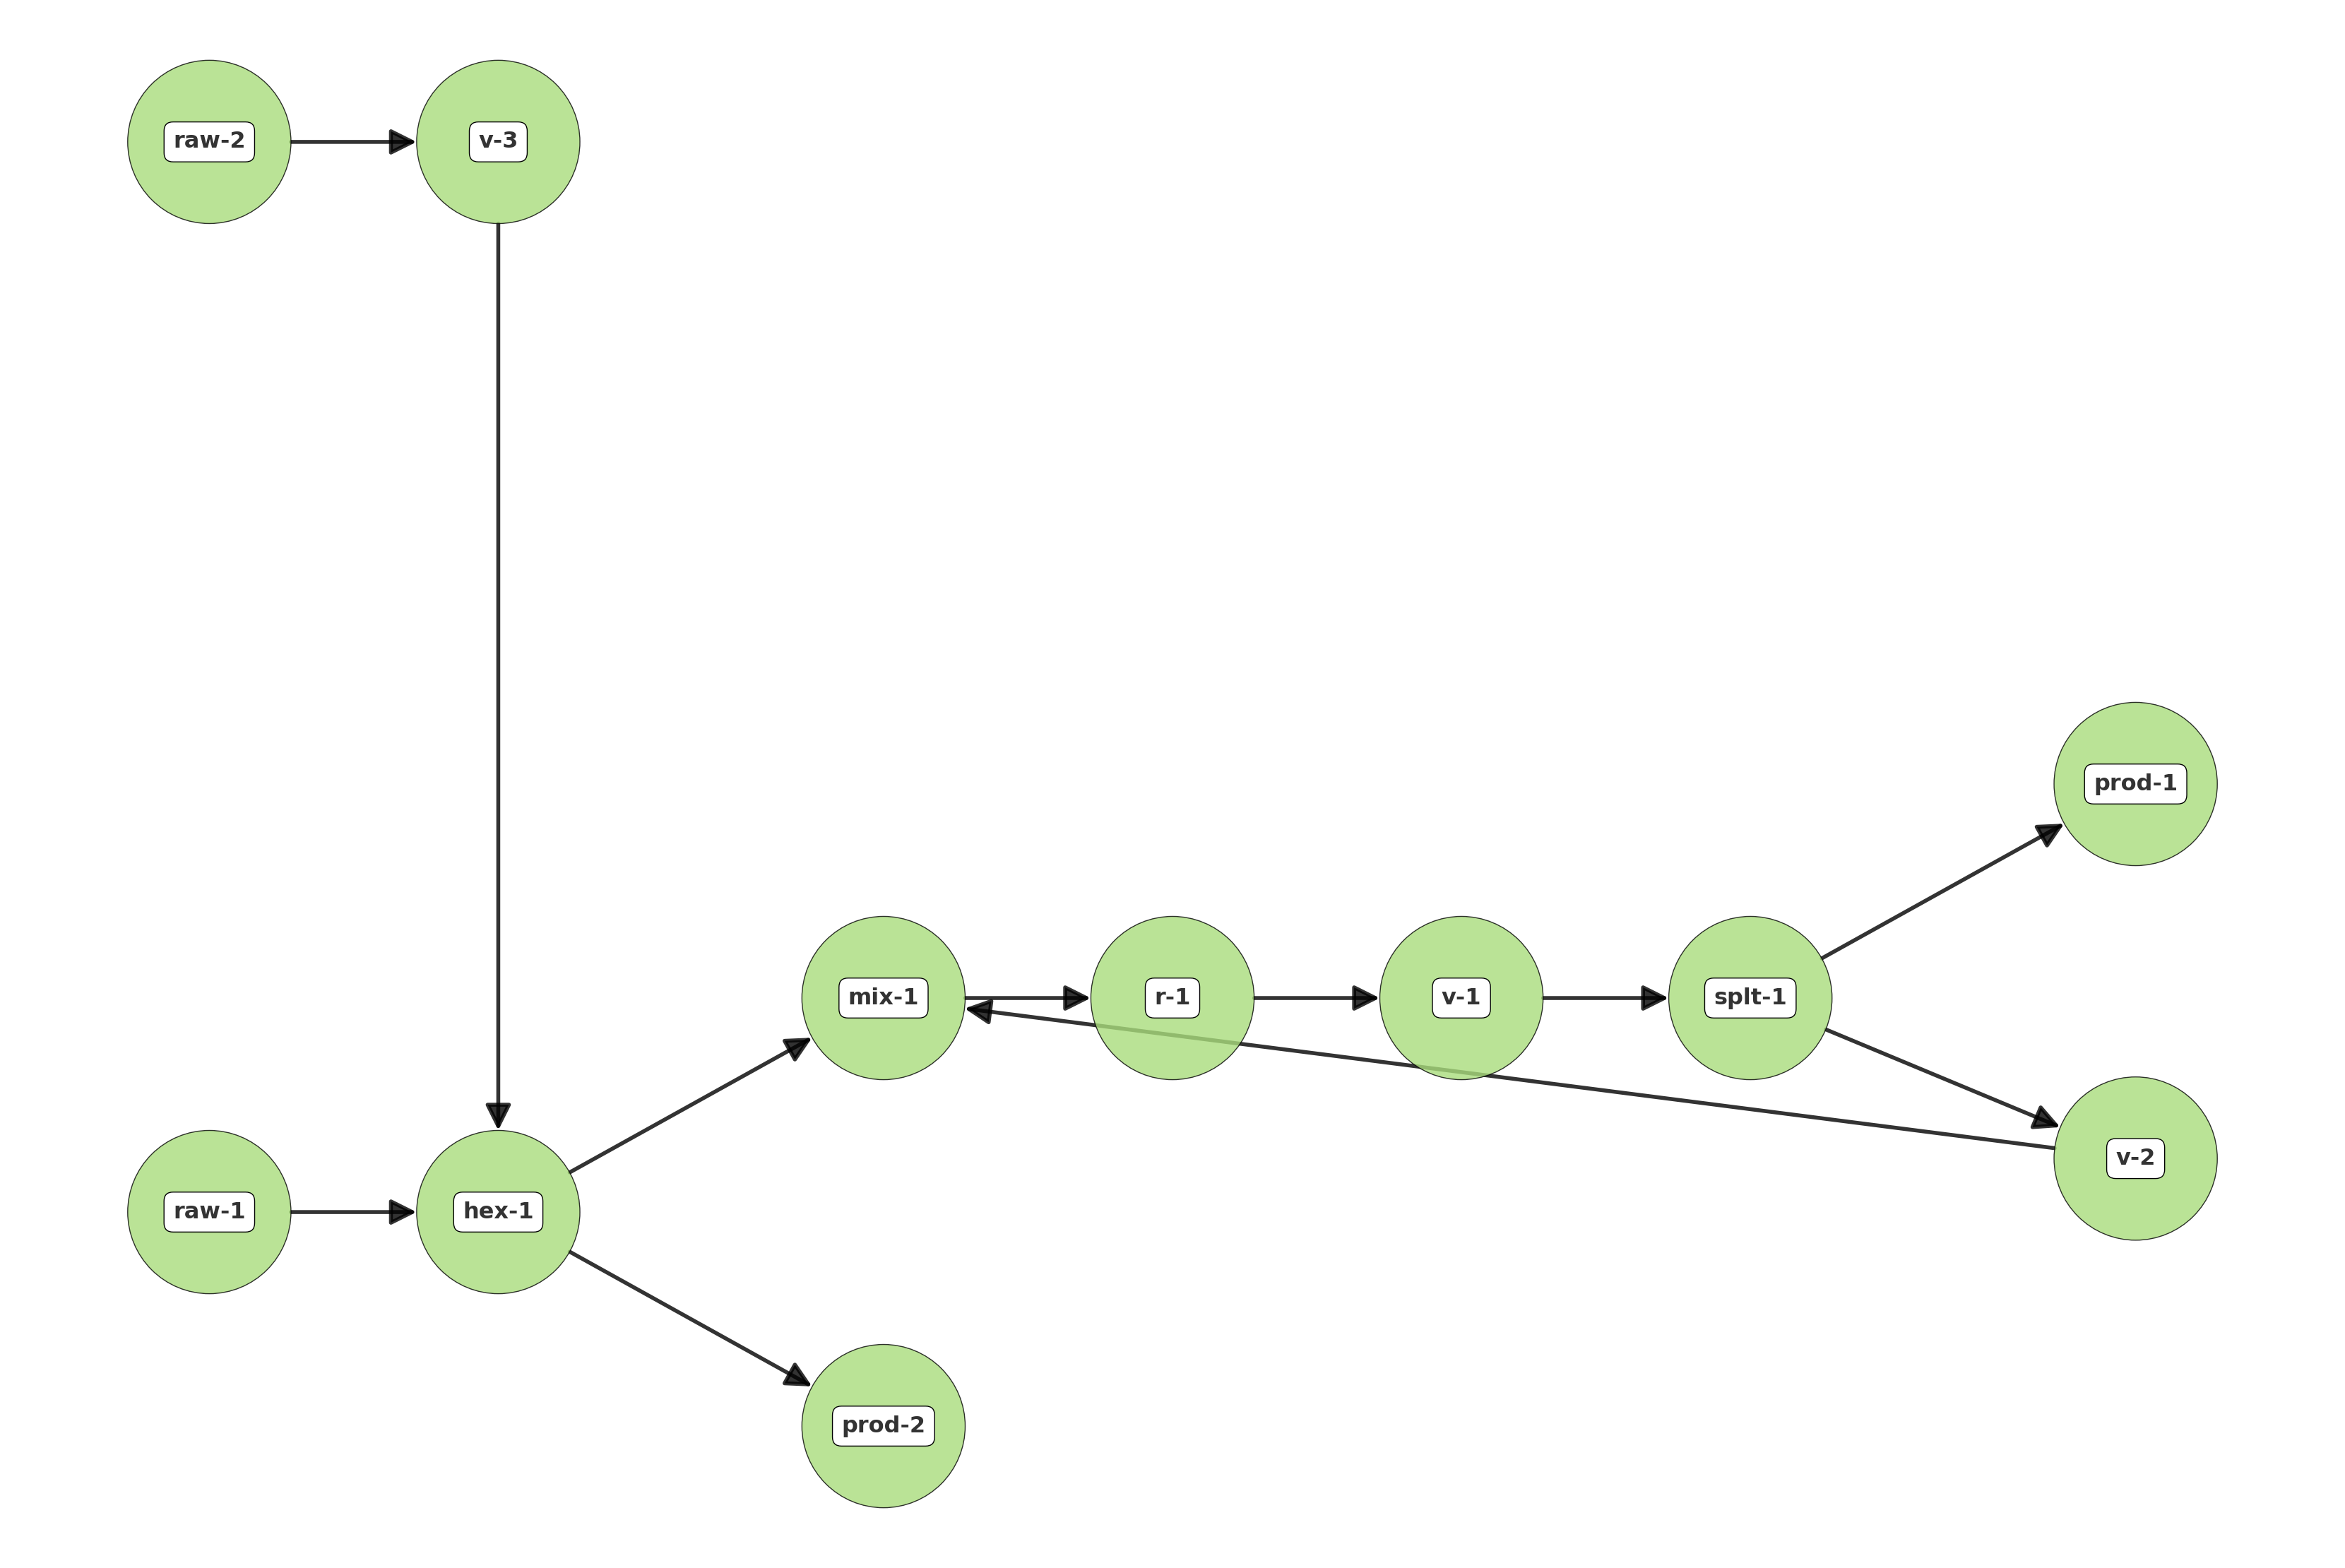

(<Figure size 3300x2200 with 1 Axes>, None, None)

In [27]:
flowsheet_pfd.visualize_flowsheet(table=False, pfd_path="plots/flowsheet1", plot_with_stream_labels=False,plot_as_pfd=False)

## PID

In [28]:
import networkx as nx
G2 = nx.DiGraph()

In [29]:
from Flowsheet_Class.flowsheet import Flowsheet
flowsheet_pid = Flowsheet()
flowsheet_pid.state = G2
sfiles_pid = '(raw)(hex){1}(C){TC}_1(mix)<1(r)[(C){LC}_2](v)<_2(splt)[(prod)](C){FC}_3(v)1<_3n|(raw)(v)<_1(hex){1}(prod)'
flowsheet_pid.create_from_sfiles(sfiles_pid,overwrite_nx=True)

['(raw)', '(hex)', '{1}', '(C)', '{TC}', '_1', '(mix)', '<1', '(r)', '[', '(C)', '{LC}', '_2', ']', '(v)', '<_2', '(splt)', '[', '(prod)', ']', '(C)', '{FC}', '_3', '(v)', '1', '<_3', 'n|', '(raw)', '(v)', '<_1', '(hex)', '{1}', '(prod)']


In [30]:
# list_pid = nx.generate_adjlist(G2)
list_pid = nx.generate_edgelist(G2)


In [31]:
adj2 = []

for line in list_pid:
    words = line.strip().split(maxsplit=2)  # split only first two words
    e1,e2 = words[0],words[1]
    adj2.append([e1,e2])

    

In [32]:
len(adj2)
for edge in adj2:
    print(edge)

['raw-1', 'hex-1/1']
['hex-1/1', 'C-1/TC']
['C-1/TC', 'mix-1']
['C-1/TC', 'v-3']
['mix-1', 'r-1']
['r-1', 'C-2/LC']
['r-1', 'v-1']
['C-2/LC', 'v-1']
['v-1', 'splt-1']
['splt-1', 'prod-1']
['splt-1', 'C-3/FC']
['C-3/FC', 'v-2']
['v-2', 'mix-1']
['raw-2', 'v-3']
['v-3', 'hex-1/2']
['hex-1/2', 'prod-2']


Number of unit operations = 11
Number of controllers = 3
Number of indicators = 0 
Number of transmitters = 0


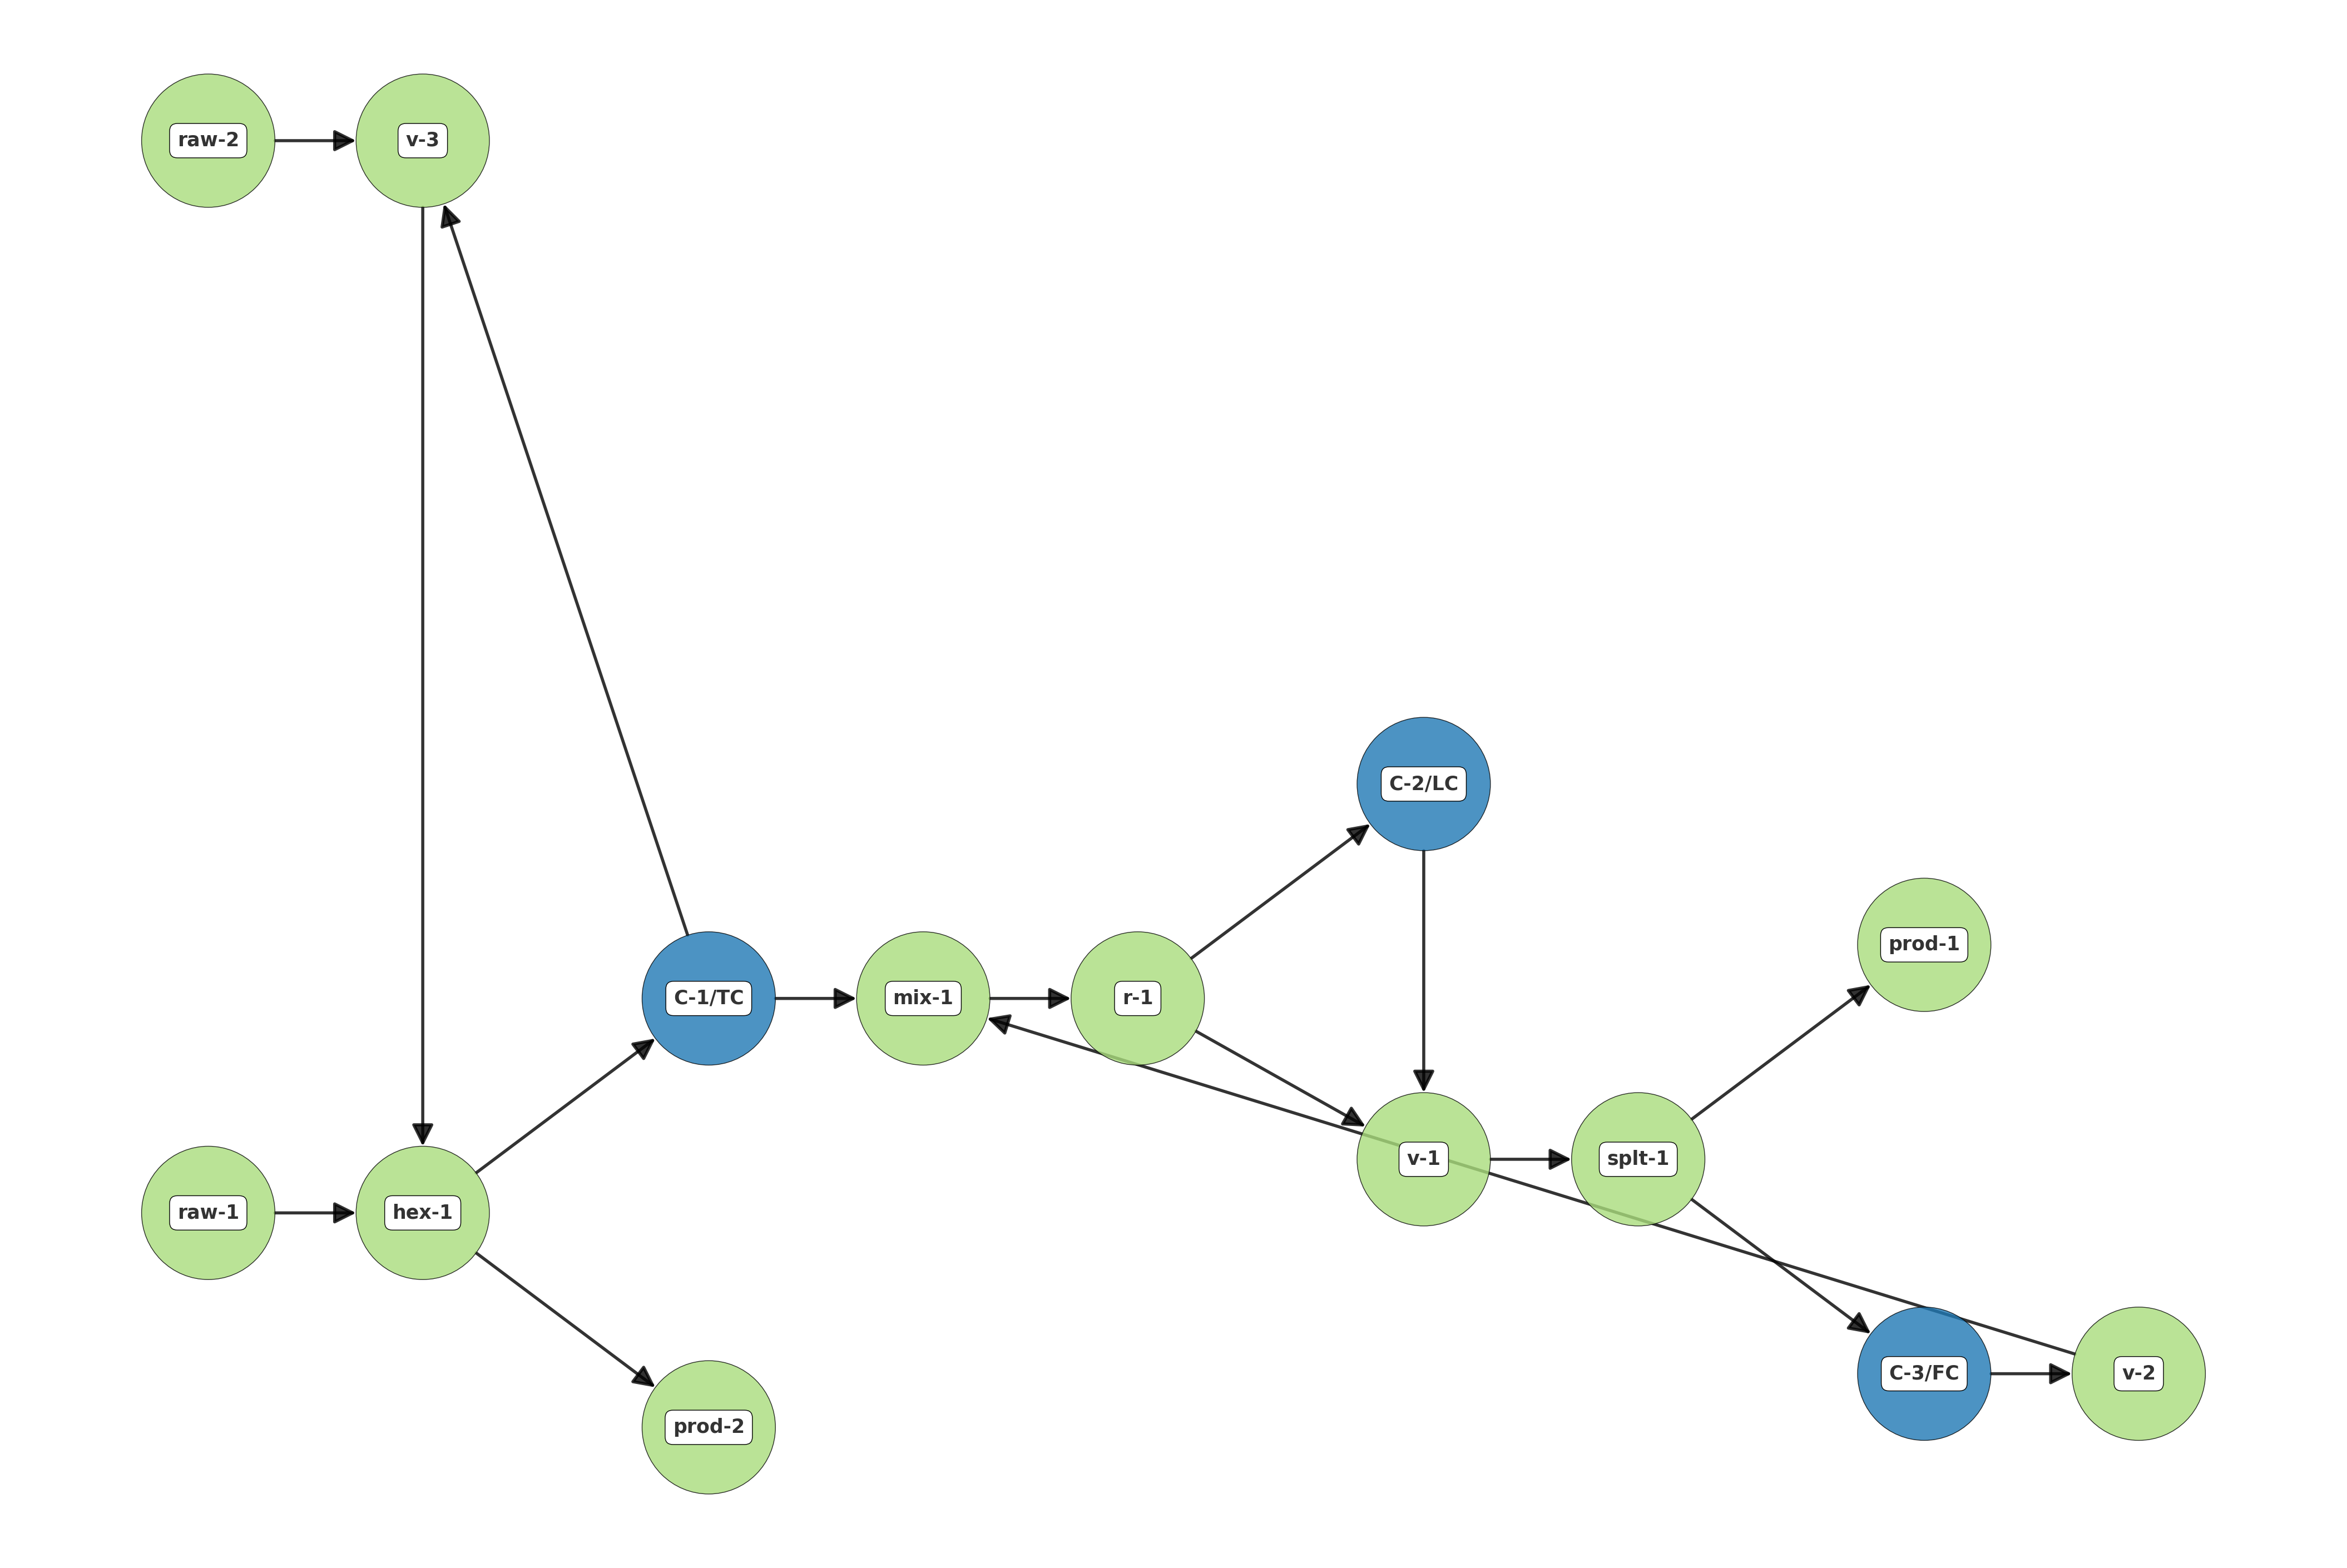

(<Figure size 4200x2800 with 1 Axes>, None, None)

In [33]:
flowsheet_pid.visualize_flowsheet(table=False, pfd_path="plots/flowsheet1", plot_with_stream_labels=False,plot_as_pfd=False)

## To compare graph1 is subset of graph2

In [34]:
set1 = set(tuple(x) for x in adj1)
set2 = set(tuple(x) for x in adj2)

is_subset = set1.issubset(set2)
print(is_subset)  


False


In [35]:
count = 0
not_in_adj2 = []

for edges in adj1:
    if edges not in adj2:
        count += 1
        not_in_adj2.append(edges)

print("Count:", count)
print("Edges not in adj2:", not_in_adj2)

# they may be connected i

Count: 2
Edges not in adj2: [['hex-1/1', 'mix-1'], ['splt-1', 'v-2']]


In [36]:


def check_remaining_paths(graph1: nx.DiGraph, graph2: nx.DiGraph):
    missing_edges = []

    for u, v in graph1.edges():
        if not graph2.has_edge(u, v):
            try:
                if nx.has_path(graph2, u, v):
                    print(f"Path exists between {u} -> {v} in Graph2 (even though edge is missing).")
                else:
                    print(f"No path exists between {u} -> {v} in Graph2.")
                    missing_edges.append((u, v))
            except nx.NodeNotFound:
                print(f"Nodes {u} or {v} not found in Graph2.")
                missing_edges.append((u, v))
    
    return missing_edges

missing_edges = check_remaining_paths(G1,G2)

Path exists between hex-1/1 -> mix-1 in Graph2 (even though edge is missing).
Path exists between splt-1 -> v-2 in Graph2 (even though edge is missing).
